In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import warnings
import numpy as np
import pandas as pd
from pathlib import Path

In [0]:
from datetime import datetime

In [0]:
PATH_TO_DATA = Path('/content/gdrive/My Drive/mlcourse/part_1')

In [0]:
train_df = pd.read_csv(PATH_TO_DATA / 'flight_delays_train.csv')
train_df['hour'] = [ int(train_df.DepTime[i]/100) for i in train_df.index]
train_df['hour'] = train_df.hour.astype('object')
train_df['Month'] = train_df['Month'].apply(lambda x: x[2:])
train_df['DayofMonth'] = train_df['DayofMonth'].apply(lambda x: x[2:])
train_df['DayOfWeek'] = train_df['DayOfWeek'].apply(lambda x: x[2:])
train_df = train_df.drop(train_df[train_df['DepTime'] >= 2400].index)
train_df = train_df.drop('DepTime', axis=1)

In [0]:
year_list = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]

In [0]:
train_df['year'] = [0 for i in train_df.index]

In [0]:
from datetime import datetime

def f(mth, dom, dow):
  for y in year_list:
    x = str(y) + str('-') + mth + str('-') + dom
    if datetime.strptime(x, '%Y-%m-%d').weekday() == int(dow) - 1:
      return y

In [0]:
train_df['year'] = [f(train_df['Month'][i], train_df['DayofMonth'][i], train_df['DayOfWeek'][i]) for i in train_df.index]
train_df['year'] = train_df.year.astype('object')

In [0]:
train_df['time'] = [datetime.strptime(str(str(train_df.year[i]) + str('-') + str(train_df.Month[i]) + str('-') + str(train_df.DayofMonth[i]) + str(' ') + str(train_df.hour[i])), '%Y-%m-%d %H') for i in train_df.index]

In [0]:
train_df['y'] = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0})

In [0]:
train_df = train_df.drop('dep_delayed_15min', axis=1)

In [20]:
train_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,hour,year,time,y
0,8,21,7,AA,ATL,DFW,732,19,2016,2016-08-21 19:00:00,0
1,4,20,3,US,PIT,MCO,834,15,2016,2016-04-20 15:00:00,0
2,9,2,5,XE,RDU,CLE,416,14,2016,2016-09-02 14:00:00,0
3,11,25,6,OO,DEN,MEM,872,10,2017,2017-11-25 10:00:00,0
4,10,7,6,WN,MDW,OMA,423,18,2017,2017-10-07 18:00:00,1


In [0]:
col = ['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'hour', 'year']
for c in col:
  train_df[c] = train_df[c].astype('int')

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
%matplotlib inline

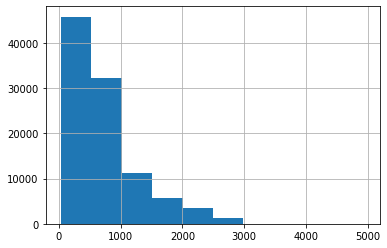

In [25]:
train_df['Distance'].hist();

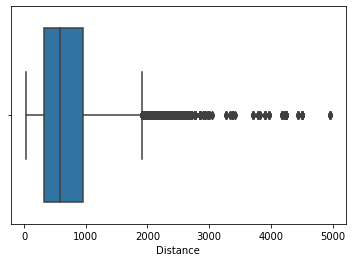

In [26]:
sns.boxplot(train_df['Distance']);

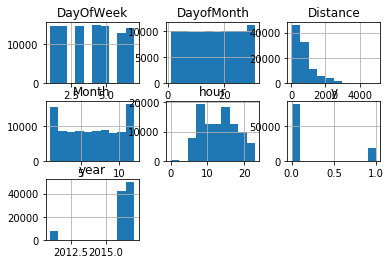

In [27]:
train_df.hist();

In [29]:
train_df['Origin'].value_counts()[:10]

ATL    5819
ORD    4870
DFW    4270
LAX    3257
IAH    3048
DEN    2972
PHX    2729
LAS    2510
CVG    2344
EWR    2196
Name: Origin, dtype: int64

In [30]:
train_df['Dest'].value_counts()[:10]

ATL    5791
ORD    4933
DFW    4336
LAX    3205
IAH    3056
DEN    2866
PHX    2747
LAS    2475
CVG    2433
EWR    2190
Name: Dest, dtype: int64

In [31]:
#распределение целевого признака
train_df['y'].value_counts()

0    80951
1    19020
Name: y, dtype: int64

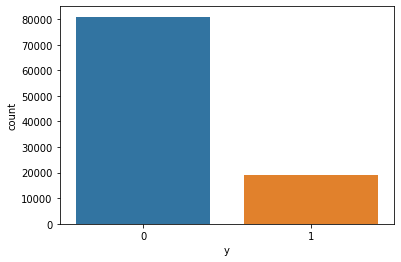

In [32]:
sns.countplot(train_df['y']);

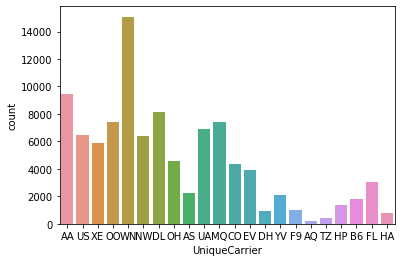

In [33]:
sns.countplot(train_df['UniqueCarrier']);

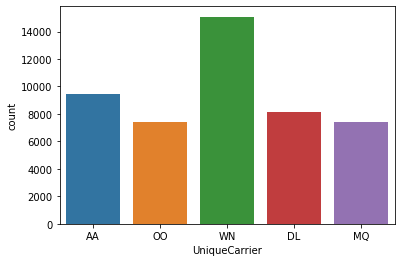

In [34]:
sns.countplot(train_df['UniqueCarrier'][train_df['UniqueCarrier'] \
                                        .isin((train_df['UniqueCarrier'] \
                                        .value_counts().head().index))]);

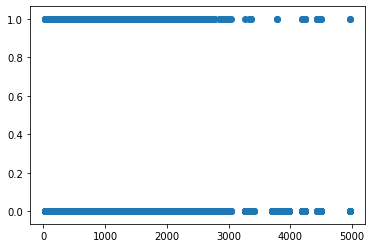

In [35]:
plt.scatter(train_df['Distance'], train_df['y']);

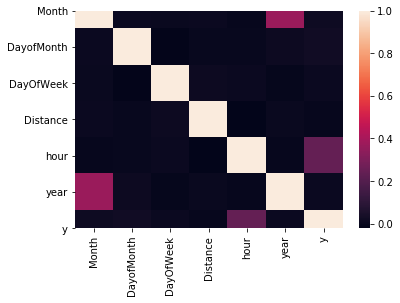

In [36]:
sns.heatmap(train_df.corr());

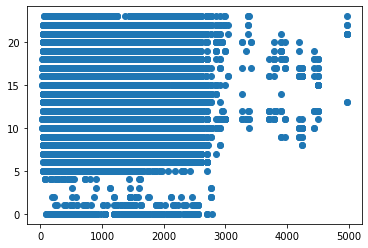

In [37]:
plt.scatter(train_df['Distance'], train_df['hour']);

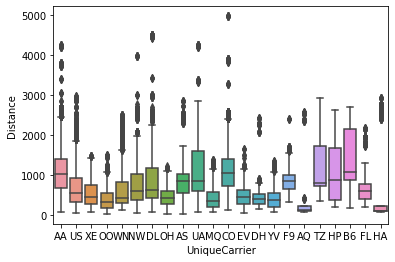

In [38]:
sns.boxplot(x = 'UniqueCarrier', y = 'Distance', data = train_df);

In [39]:
train_df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,hour,year,time,y
0,8,21,7,AA,ATL,DFW,732,19,2016,2016-08-21 19:00:00,0
1,4,20,3,US,PIT,MCO,834,15,2016,2016-04-20 15:00:00,0
2,9,2,5,XE,RDU,CLE,416,14,2016,2016-09-02 14:00:00,0
3,11,25,6,OO,DEN,MEM,872,10,2017,2017-11-25 10:00:00,0
4,10,7,6,WN,MDW,OMA,423,18,2017,2017-10-07 18:00:00,1


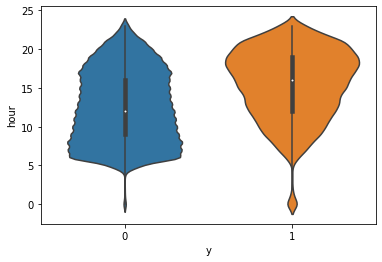

In [40]:
sns.violinplot(x = 'y', y = 'hour', data = train_df);

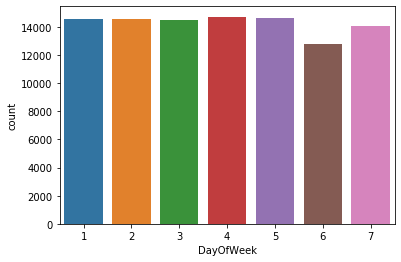

In [41]:
sns.countplot(train_df['DayOfWeek']);

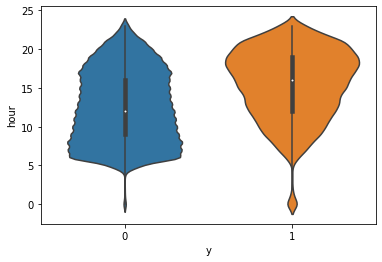

In [42]:
sns.violinplot(x = 'y', y = 'hour', data = train_df);

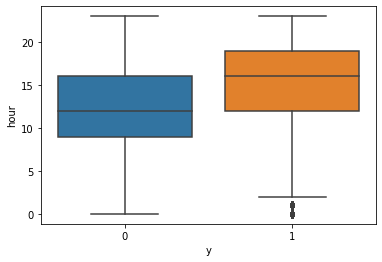

In [43]:
sns.boxplot(x = 'y', y = 'hour', data = train_df);

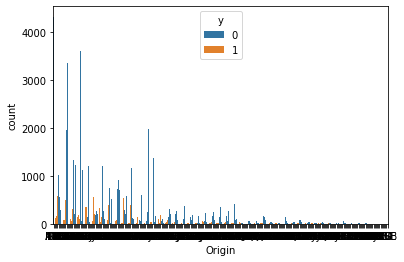

In [44]:
sns.countplot(x = 'Origin', hue = 'y', data = train_df);